In [110]:
import sys
import os
os.chdir(sys.path[3])

In [121]:
import geopandas as gpd
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from matplotlib.pyplot import figure

### Upload Data

In [135]:
data_general = pd.read_csv(r'data/process/new_data.csv', skiprows=[1, 2]).reset_index()

## Data by:
1. California
2. Alberta
3. Washington

In [136]:
data_states = pd.read_csv(r'data/process/res_stolen_loc_splitted.csv', skiprows=[1, 2]).reset_index()

In [132]:
cols = ['Total','California','Alberta','Washington']
per_cols = ['per_'+ col for col in cols]
colors =['red','blue','green','orange']

In [138]:
def count_per_city_question_var(my_data: DataFrame, old_name: str, new_name: str, is_state: str, per_name_def:str):
    # For total work with all data anf for state work only with the state in @is_state
    # Select only the data of question name (@old_name)
    if is_state == 'Total':
        rel_demographic = DataFrame(my_data[old_name])
    else:
        rel_demographic = DataFrame(my_data[my_data['state'] == is_state][old_name])
    # Rearrange data
    rel_demographic = rel_demographic.rename(columns={old_name: new_name})
    rel_demographic = rel_demographic[rel_demographic[new_name].notna()].reset_index()

    # calculate absolute and relative count for each veritable
    sum_temp = rel_demographic.groupby(by=[new_name]).count().rename(columns={'index': is_state})
    sum_temp[per_name_def] = sum_temp[is_state] / sum_temp[is_state].sum() * 100
    return sum_temp

## All the demographic parameters

In [ ]:
data_store= []
# The coe run over each tuple
for pair in {'Q34': 'year', 'Q35': 'gender', 'Q36': 'income', 'Q38': 'education', 'Q39': 'ethnic_origin'}.items():
    print(pair)
    # Get the question number and its new name
    question_number = pair[0]
    per_name = pair[1]
    # count stat per state/total and question_number
    sumy = count_per_city_question_var(data_general, old_name=question_number, new_name=per_name, is_state=cols[0],per_name_def=per_cols[0])
    for i,name in enumerate(cols[1:]):
        temp_per_name = per_cols[i+1]
        sumy[[name, temp_per_name]] = count_per_city_question_var(data_states, old_name=question_number,
                                                                  new_name=per_name,
                                                                  is_state=name, per_name_def=temp_per_name)
    if per_name == 'year':
        sumy.index = sumy.index.astype('int32')
    # add the new data to datastore which will present latter
    data_store.append(sumy.fillna(0).astype('int32'))

,Total,per_Total,California,per_California,Alberta,per_Alberta,Washington,per_Washington
year,,,,,,,,
1935,1,0,0,0,1,0,0,0
1938,1,0,1,0,0,0,0,0
1943,2,0,1,0,1,0,0,0
1944,3,0,1,0,0,0,1,0
1945,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2008,3,0,0,0,1,0,0,0
2009,1,0,0,0,0,0,0,0
2010,3,0,0,0,1,0,1,0


<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:xlabel='year'>

<AxesSubplot:xlabel='year'>

,Total,per_Total,California,per_California,Alberta,per_Alberta,Washington,per_Washington
gender,,,,,,,,
Man,1060,61,440,65,123,56,89,61
Non-binary / third gender,21,1,9,1,1,0,1,0
Prefer not to say,35,2,11,1,4,1,3,2
Woman,614,35,213,31,89,41,51,35


<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:xlabel='gender'>

<AxesSubplot:xlabel='gender'>

,Total,per_Total,California,per_California,Alberta,per_Alberta,Washington,per_Washington
income,,,,,,,,
"$200,000 or more per year",362,20,195,29,26,12,30,20
"Between $100,000 and $149,999 per year",272,15,97,14,39,18,29,20
"Between $150,000 and $199,999 per year",174,10,74,11,18,8,18,12
"Between $20,000 and $34,999 per year",111,6,32,4,15,6,4,2
"Between $35,000 and $49,999 per year",94,5,23,3,11,5,11,7
"Between $50,000 and $74,999 per year",223,12,73,10,28,12,19,13
"Between $75,000 and $99,999 per year",231,13,75,11,44,20,20,13
Don’t know/not sure,17,0,11,1,1,0,0,0
I prefer to not answer,160,9,62,9,30,13,9,6


<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:xlabel='income'>

<AxesSubplot:xlabel='income'>

,Total,per_Total,California,per_California,Alberta,per_Alberta,Washington,per_Washington
education,,,,,,,,
"Associate’s/vocational/technical degree (2- or 3-year degree, trades certificate) \t",110,6,27,4,38,17,3,2
Bachelor’s degree (university 4-year degree) \t,672,38,257,38,80,36,65,44
"Graduate degree (e.g., Master’s, Professional degree, Doctorate)",714,41,299,44,58,26,64,44
"Graduated high school (i.e., High school diploma) \t",53,3,21,3,11,5,1,0
I prefer to not answer,26,1,12,1,6,2,0,0
Some high school or less \t,32,1,12,1,7,3,2,1
Some university (no degree),124,7,44,6,17,7,10,6


<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:xlabel='education'>

<AxesSubplot:xlabel='education'>

,Total,per_Total,California,per_California,Alberta,per_Alberta,Washington,per_Washington
ethnic_origin,,,,,,,,
"African (e.g., Moroccan, Ghanaian, South African, etc.)",19,1,10,1,0,0,0,0
"Asian (e.g., Chinese, Filipino, Korean, etc.)",84,4,50,7,9,4,3,2
"Caribbean (e.g., Cuban, Jamaican, Bajan, etc.)",4,0,2,0,0,0,0,0
"Central/South American (e.g., Mexican, Salvadorian, Argentinian, etc.)",51,2,28,4,2,0,3,2
"European (e.g., British Isles, German, French, Greek, Italian, etc.)",1271,73,459,68,170,78,124,85
I prefer to not answer,78,4,29,4,15,6,3,2
"Indigenous (First Nations, Metis, Inuk/Inuit, etc.)",11,0,4,0,4,1,1,0
"Middle Eastern (e.g., Lebanese, Iranian, Syrian, etc.)",16,0,7,1,3,1,0,0
Multi-ethnic (2+ ethnic groups),99,5,47,7,5,2,8,5


<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:xlabel='ethnic_origin'>

<AxesSubplot:xlabel='ethnic_origin'>

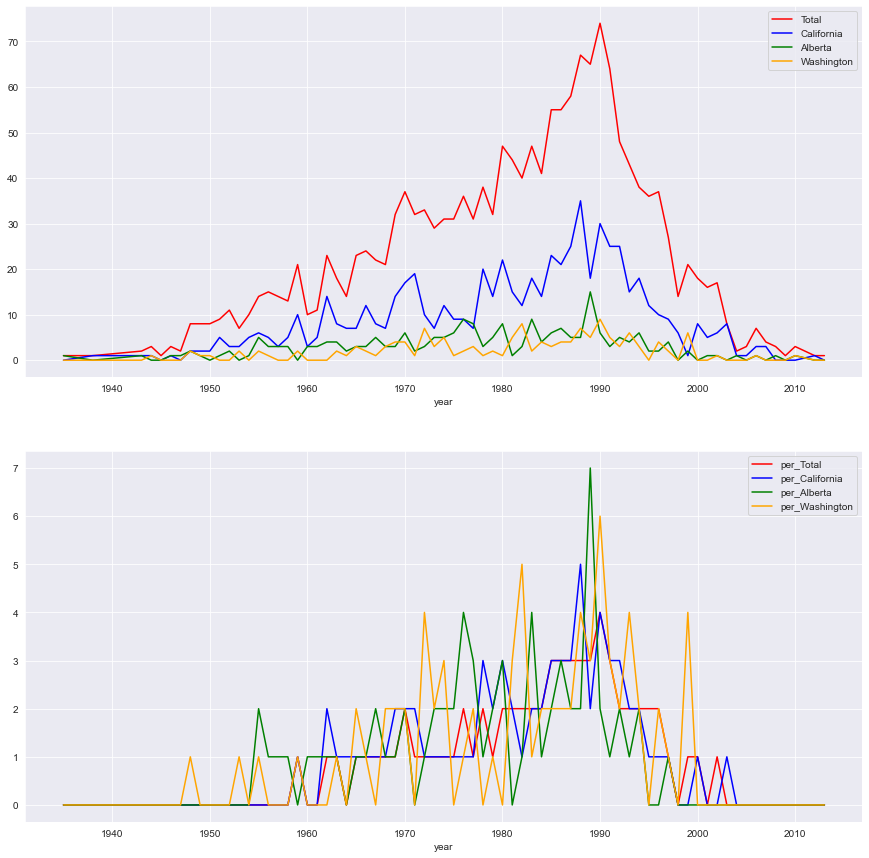

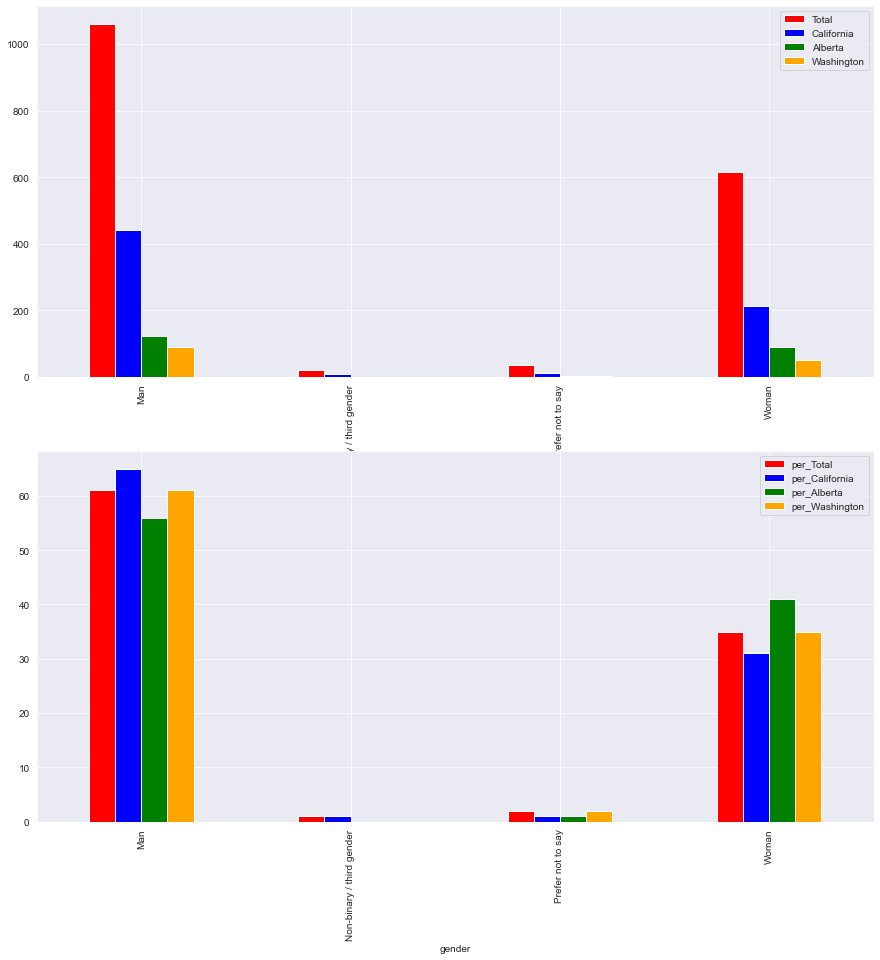

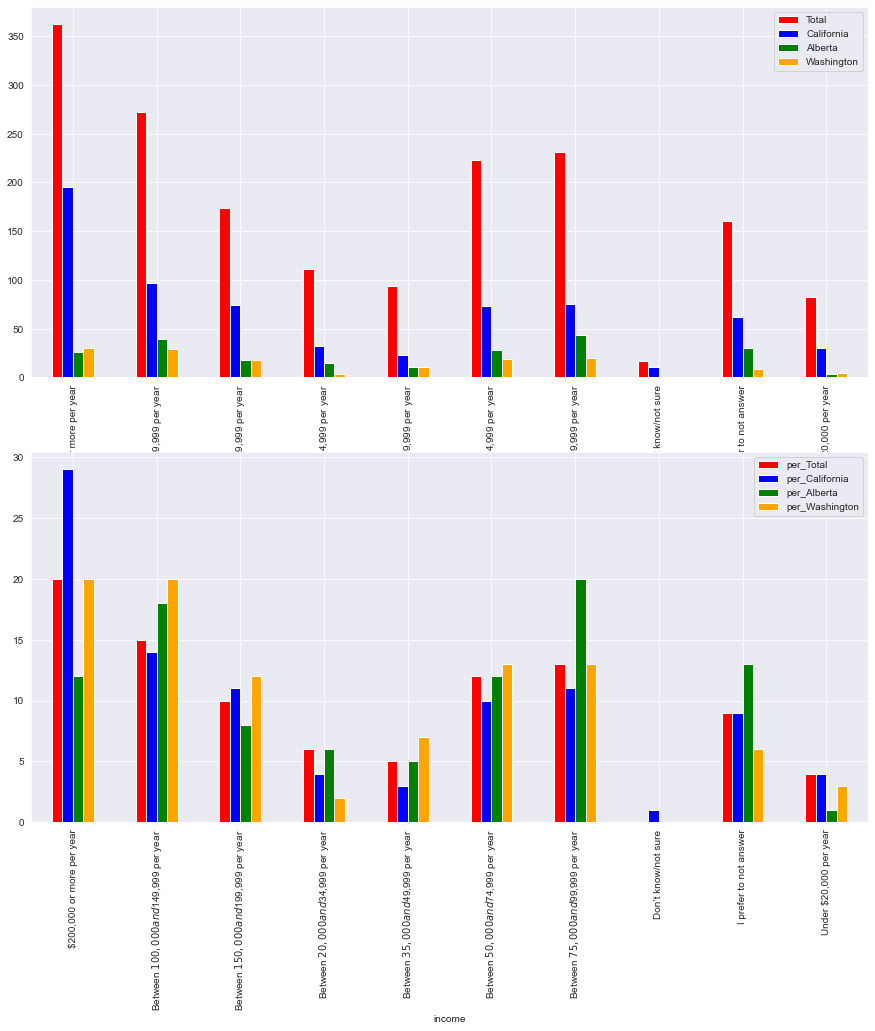

C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


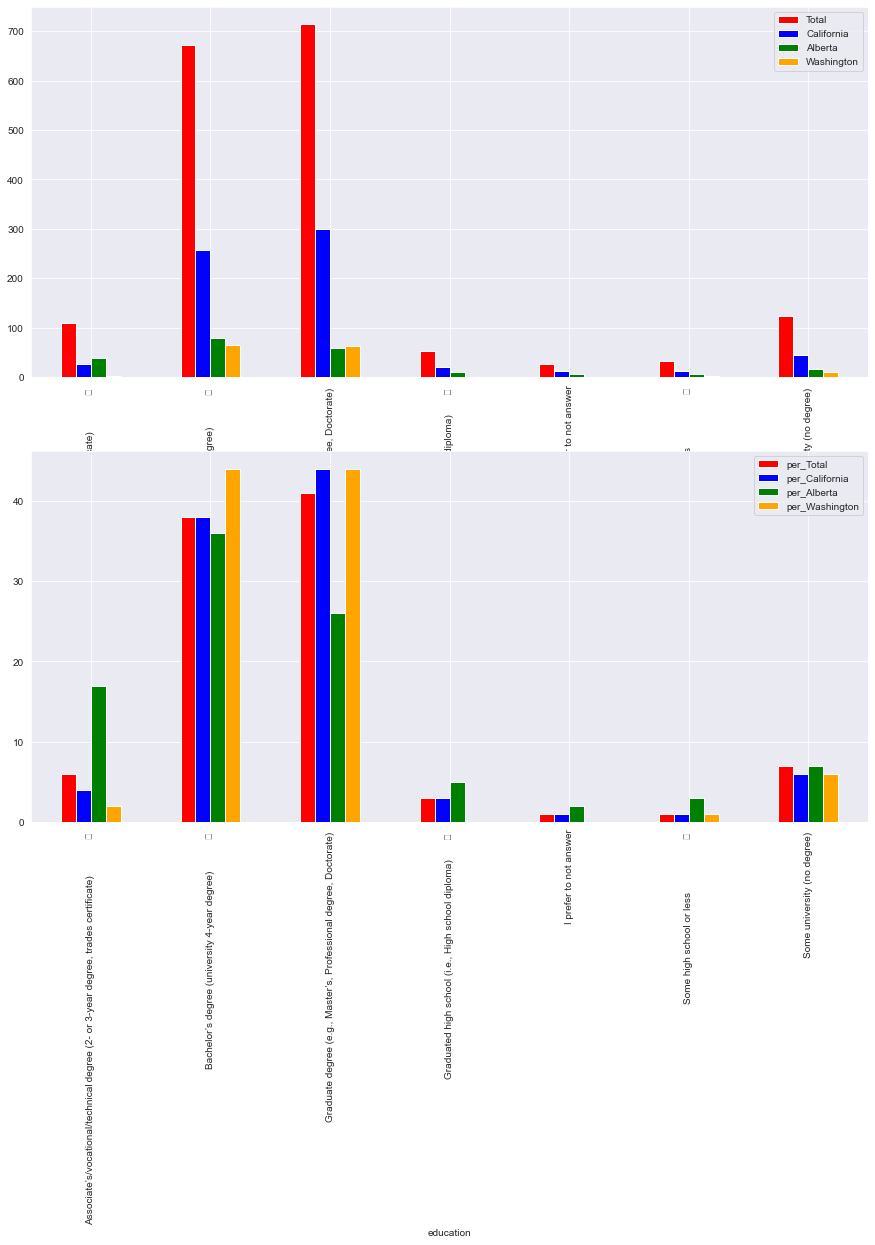

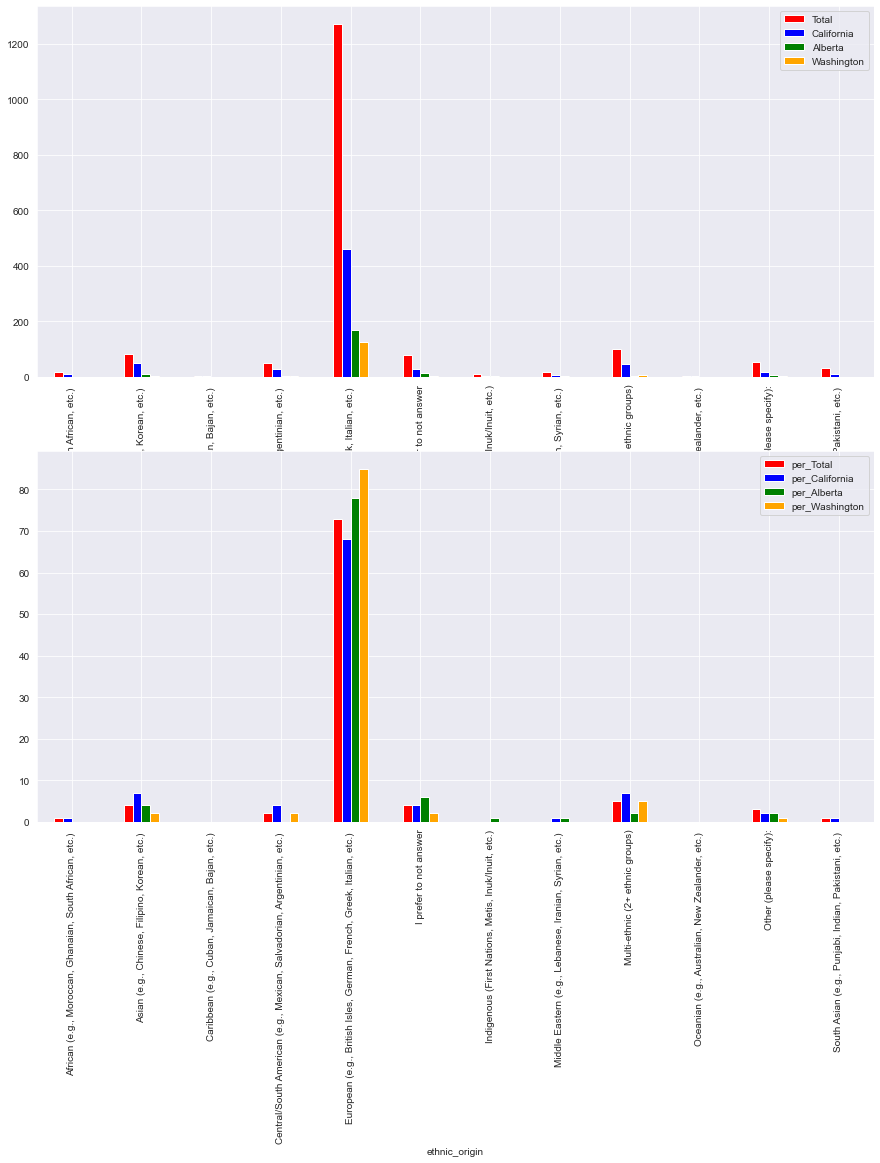

In [148]:
for df in data_store:
    df
    figure(figsize=(15, 15))
    if df.index.name =='year':
        df[cols].plot(ax= plt.subplot(2,1,1),color = colors)
        df[per_cols].plot(ax= plt.subplot(2,1,2),color = colors)
    else:
        df[cols].plot.bar(ax= plt.subplot(2,1,1),color = colors)
        df[per_cols].plot.bar(ax= plt.subplot(2,1,2),color = colors)


In [ ]:
{}